In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import warnings
from tabulate import tabulate

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("breast_cancer.csv")

 Rename columns as 'Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'

In [3]:
df.columns=['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin','Normal_Nucleoli', 'Mitoses', 'Class']

In [4]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


Drop redundant column

In [5]:
df=df.drop(columns='Uniformity_Cell_Size',axis=1)
df.head()

,Id,Clump_thickness,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,5,7,10,3,2,1,2
1,1015425,3,1,1,2,2,3,1,1,2
2,1016277,6,8,1,3,4,3,7,1,2
3,1017023,4,1,3,2,1,3,1,1,2
4,1017122,8,10,8,7,10,9,7,1,4


View the summary of the dataset

In [6]:
df.describe()

,Id,Clump_thickness,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           698 non-null    int64 
 1   Clump_thickness              698 non-null    int64 
 2   Uniformity_Cell_Shape        698 non-null    int64 
 3   Marginal_Adhesion            698 non-null    int64 
 4   Single_Epithelial_Cell_Size  698 non-null    int64 
 5   Bare_Nuclei                  698 non-null    object
 6   Bland_Chromatin              698 non-null    int64 
 7   Normal_Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Convert the data type of Bare_Nuclei to an integer

In [8]:
df['Bare_Nuclei']=df['Bare_Nuclei'].replace('?',"0")

In [9]:
df['Bare_Nuclei']=df['Bare_Nuclei'].astype(int)

In [10]:
df['Bare_Nuclei']=df['Bare_Nuclei'].replace(0,np.NaN)

Check data types of columns of data frame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           698 non-null    int64  
 1   Clump_thickness              698 non-null    int64  
 2   Uniformity_Cell_Shape        698 non-null    int64  
 3   Marginal_Adhesion            698 non-null    int64  
 4   Single_Epithelial_Cell_Size  698 non-null    int64  
 5   Bare_Nuclei                  682 non-null    float64
 6   Bland_Chromatin              698 non-null    int64  
 7   Normal_Nucleoli              698 non-null    int64  
 8   Mitoses                      698 non-null    int64  
 9   Class                        698 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [12]:
df.head(25)

,Id,Clump_thickness,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,2,2.0,3,1,1,2
2,1016277,6,8,1,3,4.0,3,7,1,2
3,1017023,4,1,3,2,1.0,3,1,1,2
4,1017122,8,10,8,7,10.0,9,7,1,4
5,1018099,1,1,1,2,10.0,3,1,1,2
6,1018561,2,2,1,2,1.0,3,1,1,2
7,1033078,2,1,1,2,1.0,1,1,5,2
8,1033078,4,1,1,2,1.0,2,1,1,2
9,1035283,1,1,1,1,1.0,3,1,1,2


Identify Missing values, NAN in variables

In [13]:
df.isnull().sum()

Id                              0
Clump_thickness                 0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Check the distribution of variables using histograms

In [14]:
df_hist=df.drop(columns='Id',axis=1)


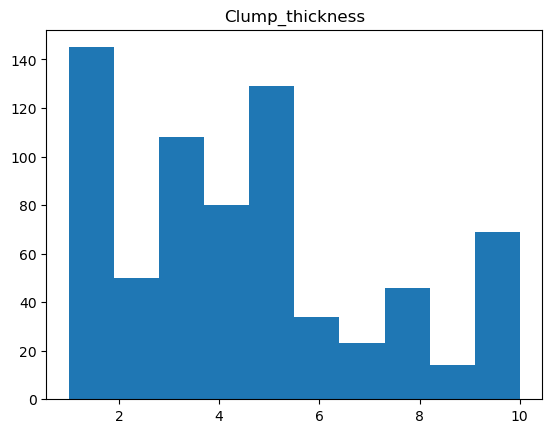

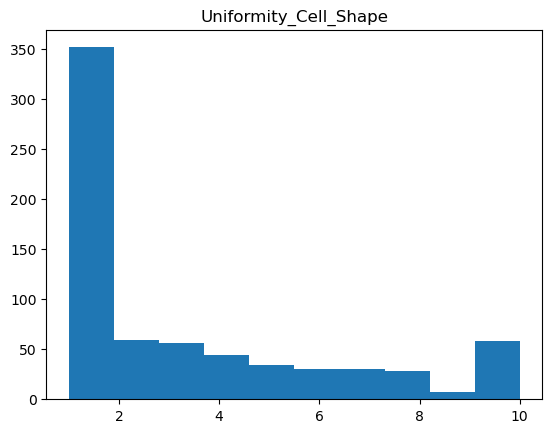

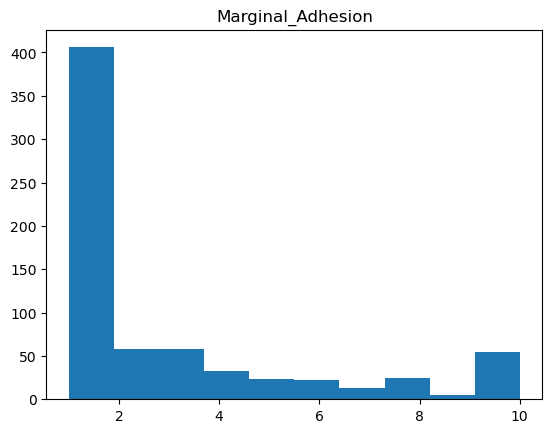

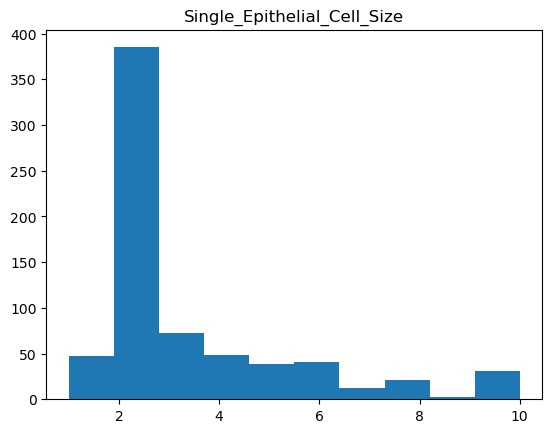

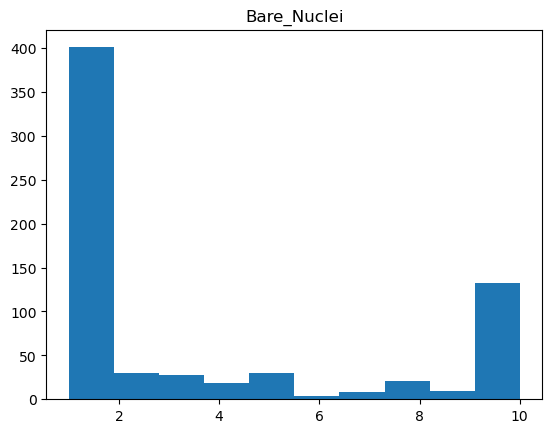

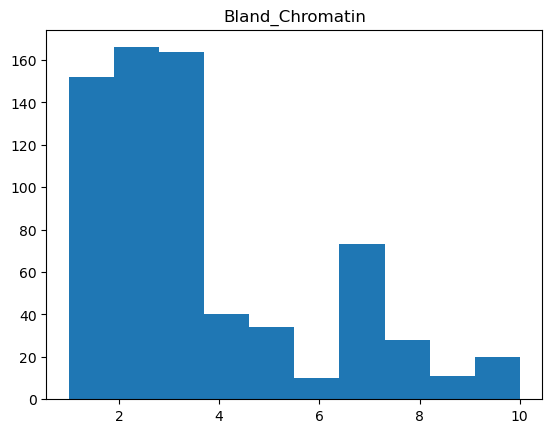

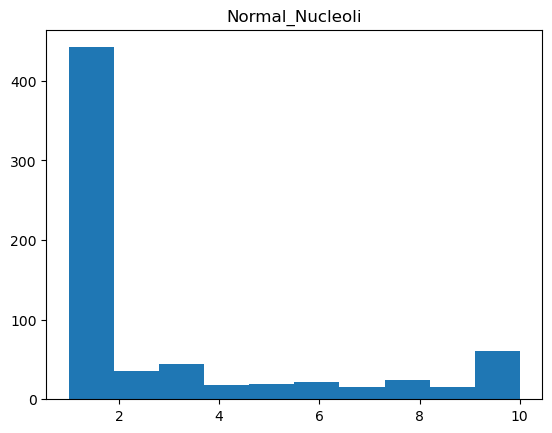

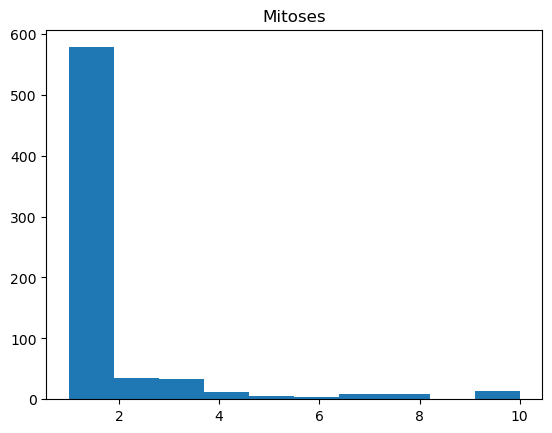

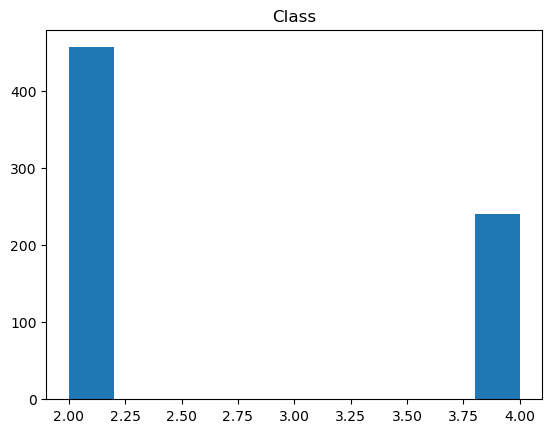

In [15]:
for col in df_hist.columns:
    plt.hist(df_hist[col])
    plt.title(col)
    plt.show()

Estimate correlation coefficients and represent using heatmaps

In [16]:
df_hist.corr()

,Clump_thickness,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.655089,0.486699,0.522108,0.593524,0.558511,0.536176,0.350176,0.716509
Uniformity_Cell_Shape,0.655089,1.000000,0.682871,0.719524,0.713661,0.736066,0.719272,0.438756,0.818794
Marginal_Adhesion,0.486699,0.682871,1.000000,0.599402,0.670434,0.666759,0.603132,0.417476,0.696605
Single_Epithelial_Cell_Size,0.522108,0.719524,0.599402,1.000000,0.585489,0.616108,0.628704,0.478975,0.682618
Bare_Nuclei,0.593524,0.713661,0.670434,0.585489,1.000000,0.680689,0.584022,0.339005,0.822563
Bland_Chromatin,0.558511,0.736066,0.666759,0.616108,0.680689,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,0.536176,0.719272,0.603132,0.628704,0.584022,0.665914,1.000000,0.428185,0.712067
Mitoses,0.350176,0.438756,0.417476,0.478975,0.339005,0.344118,0.428185,1.000000,0.423008
Class,0.716509,0.818794,0.696605,0.682618,0.822563,0.756732,0.712067,0.423008,1.000000


<Axes: >

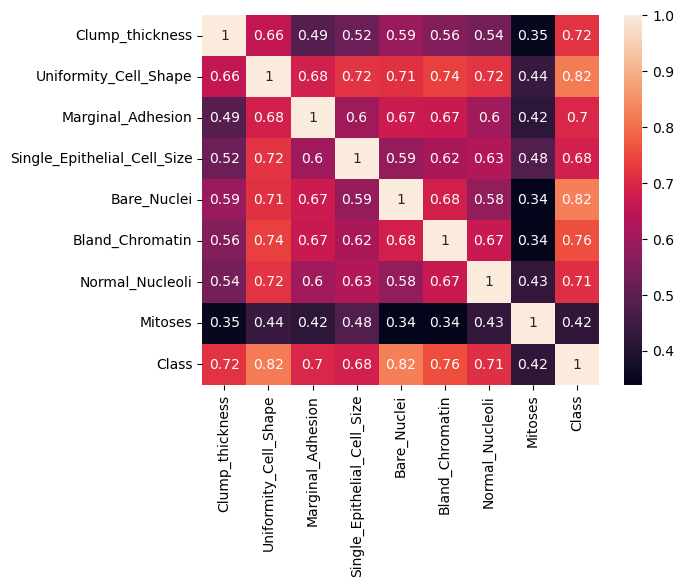

In [17]:
sns.heatmap(df_hist.corr(),annot=True)

In [18]:
df['Uniformity_Cell_Shape'].max()

10

Declare feature vector and target variable

In [19]:
x=df[['Uniformity_Cell_Shape','Normal_Nucleoli','Clump_thickness','Bland_Chromatin']]
y=df['Class']

Split data into separate training and test set

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) 

Fit the K Neighbours Classifier to the training set

In [21]:
k=3
model = KNeighborsClassifier(n_neighbors = k) 
model.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

 Predict test-set results 

In [22]:
y_pred_test=model.predict(x_test)

Check the accuracy score

In [23]:
acc_test=accuracy_score(y_test,y_pred_test)

In [24]:
print(f"Accuracy is: {acc_test}")

Accuracy is: 0.9523809523809523


Compare the train-set and test-set accuracy

In [25]:
y_pred_train=model.predict(x_train)

In [26]:
acc_train=accuracy_score(y_train,y_pred_train)

or

In [27]:
print(f"Accuracy is: {acc_train}")

Accuracy is: 0.9754098360655737


In [28]:
model.score(x_train,y_train)

0.9754098360655737

In [29]:
model.score(x_test,y_test)

0.9523809523809523

Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9) USING TABULATE:,
Tabulate the results using the Tabulate package

In [30]:
splits = [0.2, 0.25, 0.3]
k_values = [3, 4, 5, 6, 7, 8, 9]
results = []

In [31]:
for k in k_values:
    for i in splits:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=0)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)

        results.append([k, 1 - i, i, precision, recall, f1, accuracy])

headers = ["k", "Train Size", "Test Size", "Precision", "Recall", "F1 Score", "Accuracy"]

table = tabulate(results, headers=headers, tablefmt="pretty")
print(table)

+---+------------+-----------+--------------------+--------------------+--------------------+--------------------+
| k | Train Size | Test Size |     Precision      |       Recall       |      F1 Score      |      Accuracy      |
+---+------------+-----------+--------------------+--------------------+--------------------+--------------------+
| 3 |    0.8     |    0.2    | 0.9572605880348236 | 0.9571428571428572 | 0.9569952011812477 | 0.9571428571428572 |
| 3 |    0.75    |   0.25    | 0.9657142857142857 | 0.9657142857142857 | 0.9657142857142857 | 0.9657142857142857 |
| 3 |    0.7     |    0.3    | 0.9522962962962963 | 0.9523809523809523 | 0.9522453521864364 | 0.9523809523809523 |
| 4 |    0.8     |    0.2    | 0.9436628584017878 | 0.9428571428571428 | 0.9424357901911578 | 0.9428571428571428 |
| 4 |    0.75    |   0.25    | 0.9599499582985822 |        0.96        | 0.959941789958768  |        0.96        |
| 4 |    0.7     |    0.3    | 0.9522962962962963 | 0.9523809523809523 | 0.95224

Display confusion matrix

In [32]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for k=3:")
print(cm)

Confusion Matrix for k=3:
[[129   4]
 [  6  71]]


Generate classification report

In [33]:
report = classification_report(y_test, y_pred_test)
print("Classification Report for k=3:")
print(report)

Classification Report for k=3:
              precision    recall  f1-score   support

           2       0.96      0.97      0.96       133
           4       0.95      0.92      0.93        77

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



Evaluate classification error

In [34]:
classification_error = 1 - accuracy_score(y_test, y_pred_test)
print("Classification Error:", classification_error)


Classification Error: 0.04761904761904767


Generate ROC curve and ROC AUC score.

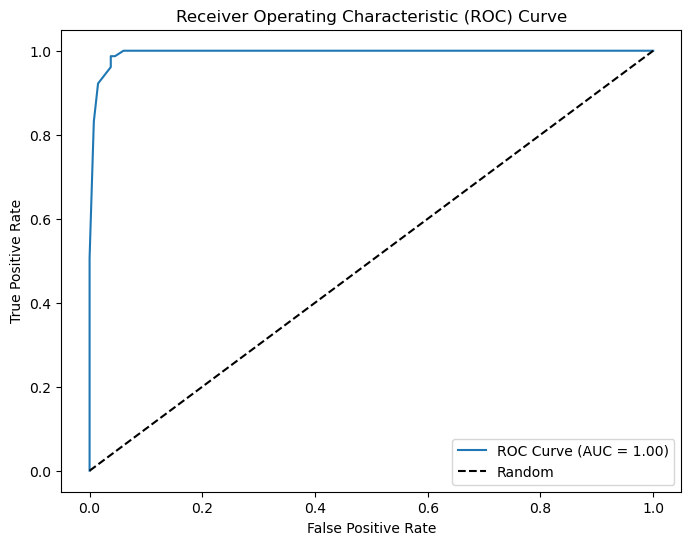

ROC AUC Score: 0.9950688409335027


In [35]:
y_train_binary = label_binarize(y_train, classes=[2, 4])
y_test_binary = label_binarize(y_test, classes=[2, 4])

k = 3
model.fit(x_train, y_train)

y_probs = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = roc_auc_score(y_test_binary, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc)

Perform k-fold validation

In [36]:
k_fold = 5
cv_scores = cross_val_score(model, x, y, cv=k_fold, scoring='accuracy')

print(f'Cross-Validation Scores (k={k_fold}):', cv_scores)
print(f'Mean Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Scores (k=5): [0.93571429 0.92142857 0.97857143 0.97841727 0.97841727]
Mean Accuracy: 0.96
